<a href="https://colab.research.google.com/github/cosminluciantuiasi/dissertation/blob/feature%2Ffacial-recognition-part1/face_recognition_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import fnmatch
from google.colab.patches import cv2_imshow
import os
import cv2
from google.colab import drive
from IPython.display import clear_output
import time
import glob
import random
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms.functional import to_tensor, normalize
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import torch.nn as nn
import torch
from torchsummary import summary
import torch.nn.functional as F
import torch.optim as optim
from torchvision.transforms import Compose, ToTensor, RandomHorizontalFlip, RandomResizedCrop, ColorJitter

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [4]:
!unzip '/content/drive/MyDrive/Colab Notebooks/disertation/dataset/pins-face-recognition.zip' -d /tmp

Streaming output truncated to the last 5000 lines.
  inflating: /tmp/PINS/pins_Stephen Amell/Stephen Amell20.jpg  
  inflating: /tmp/PINS/pins_Stephen Amell/Stephen Amell21.jpg  
  inflating: /tmp/PINS/pins_Stephen Amell/Stephen Amell22.jpg  
  inflating: /tmp/PINS/pins_Stephen Amell/Stephen Amell23.jpg  
  inflating: /tmp/PINS/pins_Stephen Amell/Stephen Amell24.jpg  
  inflating: /tmp/PINS/pins_Stephen Amell/Stephen Amell25.jpg  
  inflating: /tmp/PINS/pins_Stephen Amell/Stephen Amell26.jpg  
  inflating: /tmp/PINS/pins_Stephen Amell/Stephen Amell27.jpg  
  inflating: /tmp/PINS/pins_Stephen Amell/Stephen Amell28.jpg  
  inflating: /tmp/PINS/pins_Stephen Amell/Stephen Amell29.jpg  
  inflating: /tmp/PINS/pins_Stephen Amell/Stephen Amell3.jpg  
  inflating: /tmp/PINS/pins_Stephen Amell/Stephen Amell30.jpg  
  inflating: /tmp/PINS/pins_Stephen Amell/Stephen Amell31.jpg  
  inflating: /tmp/PINS/pins_Stephen Amell/Stephen Amell32.jpg  
  inflating: /tmp/PINS/pins_Stephen Amell/Stephen Amel

In [36]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/disertation/misc/haar.xml')

In [42]:
extensions = ['*.jpg', '*.png', '*.jpeg']
#CV2 Cascade Classifier hyperparams
scaleFactor = 1.1
minNeighbors = 4

def detect_faces_in_dataset(input_path, output_path):
  if not os.path.exists(input_path) or not os.path.exists(output_path):
    print('Provided file paths dont exist.')
    return
  for root,_,files in os.walk(input_path):
    if root==input_path:
      continue

    subclass = root.split('/')[-1]
    subclass_path = output_path+'/'+subclass

    if not os.path.exists(subclass_path):
      os.mkdir(subclass_path)

    for filename in files:
      file = os.path.join(root,filename)
      counter=0
      if any(fnmatch.fnmatch(file, extension) for extension in extensions):
        img = cv2.imread(file)
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Detect faces coords
        faces = face_cascade.detectMultiScale(gray_img, scaleFactor = scaleFactor, minNeighbors = minNeighbors)
        # Draw rectangle around the faces
        for (x, y, w, h) in faces:
          crop_face = img[y:y+h, x:x+w]
          new_filename = '.'.join([filename.split('.')[0] + "_" + str(counter),filename.split('.')[1]])

          file_path = '/'.join(root.split('/')[:-1])
          file_path = os.path.join(output_path+'/'+subclass,new_filename+'.png')
          print(file_path)
          cv2.imwrite(file_path,crop_face)
          print(f"Saved {file_path}.")

          counter+=1
        if len(faces)==0:
          print(f'No face detected on {filename}')

In [18]:
# input_path = "/content/drive/MyDrive/Colab Notebooks/disertation/dataset/test_images"
# output_path = "/content/drive/MyDrive/Colab Notebooks/disertation/dataset/transformed_images"
# detect_faces_in_dataset(input_path, output_path)

In [43]:
# input_path = "/tmp/PINS"
# output_path = "/tmp/transformed_pins"


input_path = "/content/drive/MyDrive/Colab Notebooks/disertation/dataset/yale_dataset"
output_path = "/tmp/transformed_yale"

In [35]:
# img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/disertation/dataset/yale_dataset/1/subject01.centerlight.png')
# print(img)

In [44]:
detect_faces_in_dataset(input_path, output_path)

/tmp/transformed_yale/11/subject11_0.noglasses.png
Saved /tmp/transformed_yale/11/subject11_0.noglasses.png.
/tmp/transformed_yale/11/subject11_0.rightlight.png
Saved /tmp/transformed_yale/11/subject11_0.rightlight.png.
/tmp/transformed_yale/11/subject11_0.wink.png
Saved /tmp/transformed_yale/11/subject11_0.wink.png.
/tmp/transformed_yale/11/subject11_0.sleepy.png
Saved /tmp/transformed_yale/11/subject11_0.sleepy.png.
/tmp/transformed_yale/11/subject11_0.centerlight.png
Saved /tmp/transformed_yale/11/subject11_0.centerlight.png.
/tmp/transformed_yale/11/subject11_0.happy.png
Saved /tmp/transformed_yale/11/subject11_0.happy.png.
/tmp/transformed_yale/11/subject11_0.glasses.png
Saved /tmp/transformed_yale/11/subject11_0.glasses.png.
/tmp/transformed_yale/11/subject11_0.normal.png
Saved /tmp/transformed_yale/11/subject11_0.normal.png.
/tmp/transformed_yale/11/subject11_0.leftlight.png
Saved /tmp/transformed_yale/11/subject11_0.leftlight.png.
/tmp/transformed_yale/11/subject11_0.sad.png
Sa

In [8]:
!mkdir /tmp/transformed_yale

In [45]:
!find /tmp/transformed_yale/ | wc -l
# !find /tmp/PINS/ | wc -l

182


In [125]:
# !rm -r /tmp/transformed_pins/

In [127]:
class FacesDataset(Dataset):
    def __init__(self, file_list, dataset_path, width=128, height=128, transform=None):
        self.file_list = file_list
        self.transform = transform
        self.img_size = (width, height)
        self.dataset_path = dataset_path
         # Default transform without augmentation
        self.default_transform = Compose([
            ToTensor(),
        ])


    def __len__(self):
        return len(self.file_list)

    def __getitem__(self,idx):
        img_path = self.file_list[idx]
        img = Image.open(img_path)

        original_width, original_height = img.size

        img = img.resize(self.img_size)
        img = np.array(img)
        label = img_path.split('/')
        label_name = label[-2]
        label = int(label_name)
        # labels = os.listdir(self.dataset_path)
        # labels.sort()

        # label = labels.index(label[-2])

        if self.transform:
            img = self.transform(img)
        else:
            img = self.default_transform(img)

        return img, (label,label_name)

In [128]:
from torchvision.transforms import Grayscale
def collate_fn(examples):
  processed_images = []
  processed_labels = []

  for example in examples:
    tensor_image = example[0]

    grayscale_tensor_image = Grayscale()(tensor_image)

    normalized_tensor_image = normalize(grayscale_tensor_image, [0.5], [0.5])

    normalized_tensor_image = normalized_tensor_image.unsqueeze(0)
    processed_images.append(normalized_tensor_image)
    label = np.array(example[1][0])

    tensor_label = torch.tensor(label)
    tensor_label = tensor_label.unsqueeze(0)
    processed_labels.append(tensor_label)


  torch_images = torch.cat(processed_images, dim=0)
  torch_labels = torch.cat(processed_labels, dim=0)
  return torch_images, torch_labels

In [129]:
train_test_proportion = .85

train_transform = Compose([
    RandomHorizontalFlip(p=0.5),                           # Random horizontal flip
    ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),  # Random color jitter
    ToTensor(),                                            # Convert the image to a tensor
])

images = glob.glob(os.path.join(output_path+'/*','*.png'))
random.shuffle(images)

train_samples = images[:int(train_test_proportion*len(images))]
test_samples = images[int(train_test_proportion*len(images)):]

faces_train = FacesDataset(train_samples,output_path,transform=None)
faces_test = FacesDataset(test_samples,output_path)

train_loader = DataLoader(faces_train, batch_size=16, shuffle=True, num_workers=1, collate_fn=collate_fn)
test_loader = DataLoader(faces_test, batch_size=1, shuffle=False, num_workers=1, collate_fn=collate_fn)

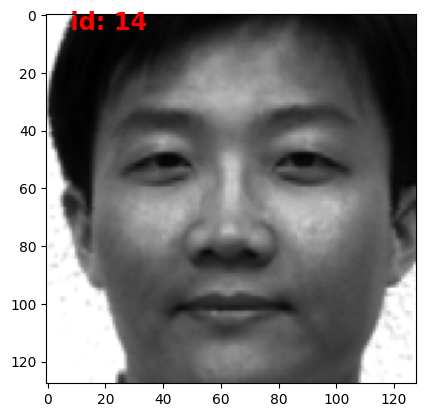

tensor([14,  5, 13,  2,  3,  4,  8, 13,  5,  2,  4, 14])


In [132]:
see_examples = 20
for i, (imgs, label_id) in enumerate(train_loader):
  clear_output(wait=True)
  plt.imshow(imgs[0].permute(1, 2, 0)[:,:,0],cmap='gray')
  plot_text = ' id: ' + str(label_id[0].item())
  plt.text(5, 5, plot_text, fontsize ='xx-large', color='red', fontweight='bold')
  plt.show()

  if i >= see_examples - 1:
    break
  print(label_id)
  time.sleep(1)

In [245]:
class ConvBlock(nn.Module):
  def __init__(self , in_channels , out_channels , kernel_size , stride , padding, mp_kernel_size, mp_stride):
    super(ConvBlock , self).__init__()
    self.conv = nn.Conv2d(in_channels , out_channels , kernel_size , stride, padding)
    self.activation = nn.ReLU()
    self.dropout = nn.Dropout(p=0.2)
    self.max_pool2d = nn.MaxPool2d(kernel_size = mp_kernel_size, stride = mp_stride)

  def forward(self , x):
    out = self.conv(x)
    out = self.activation(out)
    out = self.dropout(out)
    out = self.max_pool2d(out)
    return out

class FacesModel(nn.Module):
  def __init__(self):
    super(FacesModel, self).__init__()
    self.seq = nn.Sequential(
        ConvBlock(1,32,kernel_size=3, stride=1, padding=1, mp_kernel_size=2, mp_stride=2),
        ConvBlock(32,64,kernel_size=3, stride=1, padding=1, mp_kernel_size=2, mp_stride=2),
        ConvBlock(64,96,kernel_size=3, stride=1, padding=1, mp_kernel_size=2, mp_stride=2),
        ConvBlock(96,128,kernel_size=3, stride=1, padding=1, mp_kernel_size=2, mp_stride=2),
        nn.Dropout(p=0.5),
        nn.Flatten(),
        nn.Linear(in_features=8192 ,out_features= 512),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(in_features=512 ,out_features= 15),
        nn.LogSoftmax(dim=1)
    )
  def forward(self , x):
   out = self.seq(x)
   return out

In [222]:
# class ConvBlock(nn.Module):
#   def __init__(self , in_channels , out_channels , kernel_size , stride , padding):
#     super(ConvBlock , self).__init__()
#     self.conv = nn.Conv2d(in_channels , out_channels , kernel_size , stride , padding)
#     # self.batchNormalization = nn.BatchNorm2d(out_channels)
#     self.activation = nn.ReLU()

#   def forward(self , x):
#     out = self.conv(x)
#     # out = self.batchNormalization(out)
#     out = self.activation(out)
#     return out

# class FacesModel(nn.Module):
#   def __init__(self):
#     super(FacesModel, self).__init__()
#     self.seq = nn.Sequential(
#         ConvBlock(1,32,kernel_size=3, stride=2, padding=1),
#         nn.MaxPool2d(kernel_size=(2,2) , stride=(2,2)),
#         ConvBlock(32,64, kernel_size=3, stride=1, padding=1),
#         nn.MaxPool2d(kernel_size=(2,2) , stride=(2,2)),
#         ConvBlock(64,128, kernel_size=3, stride=1, padding=1),
#         nn.MaxPool2d(kernel_size=(2,2) , stride=(2,2)),
#         nn.Flatten(),
#         nn.Linear(in_features=8192 ,out_features= 512),
#         nn.ReLU(),
#         nn.Dropout(p=0.5),
#         nn.Linear(in_features=512 ,out_features= 15),
#         nn.Softmax(dim=1)
#     )
#   def forward(self , x):
#    out = self.seq(x)
#    return out

In [223]:
# class FacesModel(nn.Module):
#   def __init__(self):
#     super(FacesModel, self).__init__()
#     self.seq = nn.Sequential(
#         ConvBlock(3,16,kernel_size=3, stride=2, padding=1),
#         nn.MaxPool2d(kernel_size=(2,2) , stride=(2,2)),
#         ConvBlock(16,32, kernel_size=3, stride=1, padding=1),
#         nn.MaxPool2d(kernel_size=(2,2) , stride=(2,2)),
#         ConvBlock(32,64, kernel_size=3, stride=1, padding=1),
#         nn.MaxPool2d(kernel_size=(2,2) , stride=(2,2)),
#         nn.Flatten(),
#         nn.Linear(in_features=4096 ,out_features= 1024),
#         nn.ReLU(),
#         nn.Linear(in_features=1024 ,out_features= 100),
#         nn.Softmax(dim=1)
#     )
#     self.conv1 = ConvBlock(3,16,kernel_size=3, stride=2, padding=1)
#     self.conv2 = ConvBlock(16,32, kernel_size=3, stride=1, padding=1)
#     self.conv3 = ConvBlock(32,64, kernel_size=3, stride=1, padding=1)
#     self.maxPool = nn.MaxPool2d(kernel_size=(2,2) , stride=(2,2))
#     self.fc1 = nn.Linear(in_features=4096 ,out_features= 1024)
#     self.fc2 = nn.Linear(in_features=1024 ,out_features= 100)
#     self.relu = nn.ReLU()
#     self.flatten = nn.Flatten()
#   def forward(self , x):

#   #  out = self.conv1(x)
#   #  out = self.maxPool(out)
#   #  out = self.conv2(out)
#   #  out = self.maxPool(out)
#   #  out = self.conv3(out)
#   #  out = self.maxPool(out)
#   #  out = self.flatten(out)

#   # #  out = out.reshape(out.shape[0] , -1)

#   #  out = self.fc1(out)
#   #  out = self.relu(out)
#   #  out = self.fc2(out)
#   #  out = nn.Softmax()(out)
#    out = self.seq(x)


#    return out

In [247]:
faces_model

FacesModel(
  (seq): Sequential(
    (0): ConvBlock(
      (conv): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (activation): ReLU()
      (dropout): Dropout(p=0.2, inplace=False)
      (max_pool2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): ConvBlock(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (activation): ReLU()
      (dropout): Dropout(p=0.2, inplace=False)
      (max_pool2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): ConvBlock(
      (conv): Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (activation): ReLU()
      (dropout): Dropout(p=0.2, inplace=False)
      (max_pool2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (3): ConvBlock(
      (conv): Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (activation): ReLU()
      (dropout)

In [246]:
faces_model = FacesModel().to(device)
summary(faces_model,(1,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             320
              ReLU-2         [-1, 32, 128, 128]               0
           Dropout-3         [-1, 32, 128, 128]               0
         MaxPool2d-4           [-1, 32, 64, 64]               0
         ConvBlock-5           [-1, 32, 64, 64]               0
            Conv2d-6           [-1, 64, 64, 64]          18,496
              ReLU-7           [-1, 64, 64, 64]               0
           Dropout-8           [-1, 64, 64, 64]               0
         MaxPool2d-9           [-1, 64, 32, 32]               0
        ConvBlock-10           [-1, 64, 32, 32]               0
           Conv2d-11           [-1, 96, 32, 32]          55,392
             ReLU-12           [-1, 96, 32, 32]               0
          Dropout-13           [-1, 96, 32, 32]               0
        MaxPool2d-14           [-1, 96,

In [248]:
def test_loop(test_loader: DataLoader, cuda_check, net, loss_fn):
  #set model to test mode
  net.eval()

  size = len(test_loader.dataset)
  num_batches = len(test_loader)
  test_loss, correct = 0, 0

  #make sure no gradient is computed in testing phase
  with torch.no_grad():
    for test_images, test_labels in test_loader:
      if cuda_check==True:
        test_images = test_images.to(device)
        test_labels = test_labels.to(device)
      pred = net(test_images)
      # print(pred.argmax(1), test_labels, torch.argmax(pred,dim=1))
      # print(pred)
      test_loss += loss_fn(pred, test_labels).item()
      correct += torch.sum(torch.argmax(pred,dim=1) == test_labels)
  test_loss /= num_batches
  correct = float(correct)/ float(size)

  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f};\n")

def train_loop(train_loader: DataLoader, net, optimizer,loss_fn, cuda_check):
  size = len(train_loader.dataset)

  #set model to train mode - useful for batch norm or dropout
  net.train()

  for counter, (images, labels) in enumerate(train_loader):
    if cuda_check:
      images = images.to(device)
      labels = labels.to(device)

    out = net(images)

    loss = loss_fn(out, labels)
    # back-propagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if counter % 5 == 0:
      loss,current = loss.item(), (counter+1) * len(images)
      print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")



In [250]:
cuda_check=True
faces_model = FacesModel().to(device)
epochs = 200
learning_rate = 1e-4
optimizer = optim.Adam(faces_model.parameters(), lr=learning_rate)
optimizer.zero_grad()
loss_fn = nn.NLLLoss()
# loss_fn = nn.CrossEntropyLoss()

try:
  for e in range(epochs):
    print(f"Epoch {e+1}\n-------------------------------")
    train_loop(train_loader, faces_model, optimizer, loss_fn, cuda_check)
    test_loop(test_loader, cuda_check, faces_model, loss_fn )
  print("Done!")
except AssertionError as e:
    if str(e) == 'can only test a child process':
        pass  # Ignore the assertion error
    else:
        raise e

Epoch 1
-------------------------------
loss: 2.707901  [   16/  140]
loss: 2.697688  [   96/  140]
Test Error: 
 Accuracy: 4.0%, Avg loss: 2.709393;

Epoch 2
-------------------------------
loss: 2.671441  [   16/  140]
loss: 2.717912  [   96/  140]
Test Error: 
 Accuracy: 12.0%, Avg loss: 2.707519;

Epoch 3
-------------------------------
loss: 2.629690  [   16/  140]
loss: 2.670863  [   96/  140]
Test Error: 
 Accuracy: 16.0%, Avg loss: 2.696597;

Epoch 4
-------------------------------
loss: 2.645252  [   16/  140]
loss: 2.516747  [   96/  140]
Test Error: 
 Accuracy: 28.0%, Avg loss: 2.657538;

Epoch 5
-------------------------------
loss: 2.561432  [   16/  140]
loss: 2.429914  [   96/  140]
Test Error: 
 Accuracy: 24.0%, Avg loss: 2.528609;

Epoch 6
-------------------------------
loss: 1.982891  [   16/  140]
loss: 2.063474  [   96/  140]
Test Error: 
 Accuracy: 48.0%, Avg loss: 2.235431;

Epoch 7
-------------------------------
loss: 1.577252  [   16/  140]
loss: 1.434263  [  

KeyboardInterrupt: ignored

In [251]:
faces_model

FacesModel(
  (seq): Sequential(
    (0): ConvBlock(
      (conv): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (activation): ReLU()
      (dropout): Dropout(p=0.2, inplace=False)
      (max_pool2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): ConvBlock(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (activation): ReLU()
      (dropout): Dropout(p=0.2, inplace=False)
      (max_pool2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): ConvBlock(
      (conv): Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (activation): ReLU()
      (dropout): Dropout(p=0.2, inplace=False)
      (max_pool2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (3): ConvBlock(
      (conv): Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (activation): ReLU()
      (dropout)

In [266]:
total = 0
true = 0
for x,y in train_loader:
  pred = faces_model(x)
  true+= torch.sum(pred.argmax(dim=1)==y)
  total+=len(x)
print(f'{true} out of {total}')

135 out of 140


In [268]:
135/140

0.9642857142857143